In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
path = './data/iris.data.csv'
df = pd.read_csv(path)

In [3]:
import matplotlib.pyplot as plt
import os

In [4]:
names = ['sepal.length', 'sepal.width','petal.length','petal.width','variaty']
data_iris = pd.read_csv(path, names=names)

In [5]:
data_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variaty
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_iris.variaty.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: variaty, dtype: int64

In [7]:
data_iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dic = {
    'Iris-setosa':1,
    'Iris-versicolor':2,
    'Iris-virginica':3,
}


In [9]:
data_iris['variaty_num'] = data_iris['variaty'].map(dic)
data_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variaty,variaty_num
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [10]:
data_iris.variaty_num.value_counts()

3    50
2    50
1    50
Name: variaty_num, dtype: int64

In [11]:
X = data_iris[['sepal.length','sepal.width','petal.length','petal.width']]

In [12]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y = data_iris['variaty_num']

In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: variaty_num, dtype: int64

In [15]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:       sepal.length  sepal.width  petal.length  petal.width
4             5.0          3.6           1.4          0.2
57            4.9          2.4           3.3          1.0
108           6.7          2.5           5.8          1.8
92            5.8          2.6           4.0          1.2
37            4.9          3.1           1.5          0.1
39            5.1          3.4           1.5          0.2
91            6.1          3.0           4.6          1.4
6             4.6          3.4           1.4          0.3
51            6.4          3.2           4.5          1.5
118           7.7          2.6           6.9          2.3
136           6.3          3.4           5.6          2.4
84            5.4          3.0           4.5          1.5
14            5.8          4.0           1.2          0.2
78            6.0          2.9           4.5          1.5
3             4.6          3.1           1.5          0.2
142           5.8          2.7           5.1          1.9
120 

In [16]:
y_train = pd.get_dummies(y_train)
y_train.head()

,1,2,3
4,1,0,0
57,0,1,0
108,0,0,1
92,0,1,0
37,1,0,0


In [17]:
#y_test = pd.get_dummies(y_test)
y_test.head()

33     1
16     1
43     1
129    3
50     2
Name: variaty_num, dtype: int64

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(64, activation = 'tanh' , input_shape =(4,)))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer = 'rmsprop',
              loss      = ('categorical_crossentropy'),
              metrics   = ['acc'])


In [24]:
history = model.fit(X_train,y_train,epochs = 30)

Epoch 1/30
4/4 [==============================] - 0s 5ms/step - loss: 0.4238 - acc: 0.8763
Epoch 2/30
4/4 [==============================] - 0s 7ms/step - loss: 0.3760 - acc: 0.9485
Epoch 3/30
4/4 [==============================] - 0s 7ms/step - loss: 0.3645 - acc: 0.9278
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 0.3569 - acc: 0.9691
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 0.3695 - acc: 0.9175
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 0.3165 - acc: 0.9588
Epoch 7/30
4/4 [==============================] - 0s 10ms/step - loss: 0.3132 - acc: 0.9175
Epoch 8/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3084 - acc: 0.9588
Epoch 9/30
4/4 [==============================] - 0s 9ms/step - loss: 0.3448 - acc: 0.8969
Epoch 10/30
4/4 [==============================] - 0s 9ms/step - loss: 0.2792 - acc: 0.9588
Epoch 11/30
4/4 [==============================] - 0s 11ms/step - loss: 0.2724 - acc: 0

In [25]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc'])

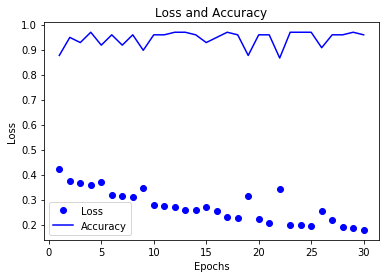

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values  = history_dict['loss']
acc_values  = history_dict['acc']
epochs = range(1,len(history_dict['acc']) + 1)

plt.plot(epochs,loss_values,'bo',label = 'Loss')
plt.plot(epochs,acc_values,'b',label = 'Accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
max(history_dict['acc'])

0.969072163105011